In [1]:
import pylablib.aux_libs.devices.DCAM as cam
from pylablib.aux_libs.devices.DCAM_lib import lib, DCAMLibError

import matplotlib.pyplot as plt
import sys
sys.path.append('C:\\Users\\IFIc\\Projects\\sabatsw\\laserlab\\scripts')
from galvo_python.galvos import *
from galvo_python.gaussian2dFit import *
from time import sleep
import logging
import warnings
from skimage import io

def sendTrigger(serialport, tpulse: int=100):
    serialport.write(tpulse.to_bytes(2, byteorder='big'))
    serialport.flush()

In [2]:
serialport = open_serial_port()

In [24]:
center0 = [int(65534./2) + 3150, int(65534./2) +  4650] #calibrated on 26/05/2020, normal incidence on galvo

move_to_positionXY(serialport, [0,0], center=center0)

In [25]:
move_to_positionXY(serialport, [2000, -2000], center=center0)

In [23]:
move_to_positionXY(serialport, [4000, -2000], center=center0)

In [4]:
cam0 = cam.DCAMCamera(0)
lib.dcamapi_uninit()     # For some reason this must be run before opening the camera
cam0.open()

min_texp = cam0.properties['EXPOSURE TIME'].min
cam0.set_value('EXPOSURE TIME', min_texp)

0.0010036691729323308

In [12]:
cam0.start_acquisition(mode='snap', nframes=5)
cam0.set_value('TRIGGER POLARITY', 2)
cam0.set_value('TRIGGER SOURCE', 2)
cam0.get_status()

'busy'

In [10]:
cam0.start_acquisition(mode='snap', nframes=5)

In [9]:
cam0.stop_acquisition()

In [6]:
cam0.set_value('TRIGGER POLARITY', 2)
cam0.set_value('TRIGGER SOURCE', 2)

2.0

In [36]:
cam0.get_value('TRIGGER SOURCE')

1.0

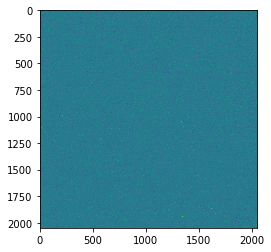

In [13]:
#%%timeit
frames = cam0.snap(nframes=5)
plt.imshow(frames[0])

In [34]:
cam0.stop_acquisition()

In [31]:
cam0.start_acquisition(mode='sequence')

In [33]:
cam0.get_status()

'busy'

In [32]:
while True:
    frame = cam0.get_frame(100)
    plt.imshow(frame)

DCAMLibError: function 'dcambuf_lockframe' raised error -2147483391 (DCAMERR_BUSY): API cannot process in busy state.

In [52]:
tpulse = 100 # pulse duration in ms
tpulse.to_bytes(2, byteorder='big')

b'\x00d'

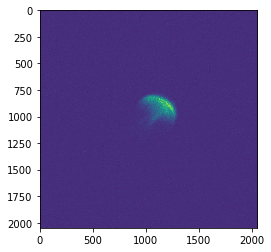

In [8]:
#%%timeit
#sendTrigger(serialport)
frames = cam0.get_frame(100)

plt.imshow(frames)